#

# TWITTER SENTIMENT ANALYSIS

* Reta Basbous

### view data

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv(r'Dtat\1600000_tweets.csv',encoding='ISO-8859-1',names=['target', 'id', 'date', 'query', 'user', 'text'])
df

,target,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
df.isnull().sum()

,0
target,0
id,0
date,0
query,0
user,0
text,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   query   1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['target'].value_counts()

,count
target,
0,800000
4,800000


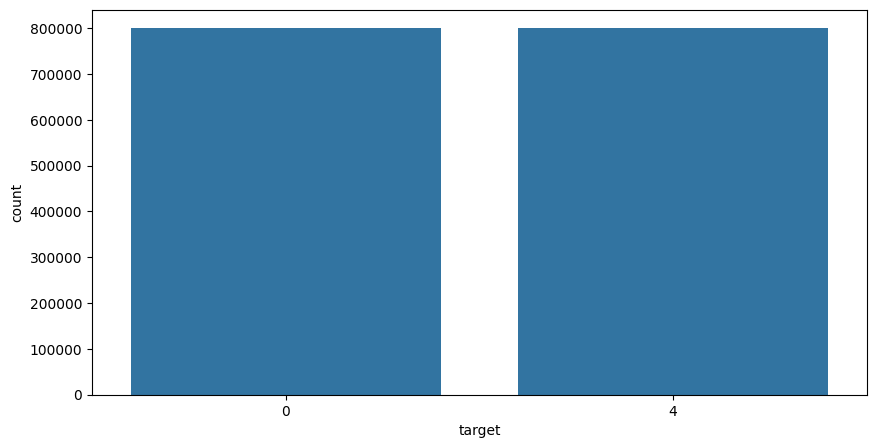

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='target',data=df)
plt.show()

- 0 --> negative tweet
- 1 --> positive tweet

In [ ]:
df.replace({'target':{4:1}},inplace=True)

### NLP Process

In [2]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
Lemmatizer=WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [1]:
def NLP(sentence):
    
    # Remove URLs
    sentence = re.sub(r'http\S+|www\S+', '', sentence)

    # Remove mentions (@username) and hashtags
    sentence = re.sub(r'@\w+|#\w+', '', sentence)

    # Remove non-alphabetical characters
    sentence = re.sub(r'[^a-zA-Z\s]', '', sentence)

    sentence= sentence.lower()
    tokens= sentence.split()
    Lemmatized_sentence= [Lemmatizer.lemmatize(word) for word in tokens if word not in stopwords.words('english')]
    Lemmatized_sentence= ' '.join(Lemmatized_sentence)
    return Lemmatized_sentence


In [ ]:
df['text'] = df['text'].apply(NLP)

In [3]:
df

,target,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,thats bummer shoulda got david carr third day
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset cant update facebook texting might cry r...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,dived many time ball managed save rest go bound
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feel itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,behaving im mad cant see
...,...,...,...,...,...,...
1599995,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,woke school best feeling ever
1599996,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,thewdbcom cool hear old walt interview
1599997,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,ready mojo makeover ask detail
1599998,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,happy th birthday boo alll time tupac amaru sh...


### Splitting the Data into Training and Test Sets

In [4]:
from sklearn.model_selection import train_test_split
X = df['text'].astype('str')
y = df['target']


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



### Vectorize the text data

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

### Optimizing the Embedding Layer Parameters for an LSTM Model

In [6]:
from keras._tf_keras.keras.preprocessing.sequence import pad_sequences
from keras._tf_keras.keras.preprocessing.text import Tokenizer

# Tokenize text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad sequences
max_sequence_length = max(len(seq) for seq in X_train_sequences)
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)


### Training  Bidirectional LSTM (Long Short-Term Memory) Neural Network

In [7]:
from keras._tf_keras.keras.models import Sequential
from keras._tf_keras.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from keras._tf_keras.keras.callbacks import EarlyStopping


In [8]:
# Model Creation
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compiling the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
# Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)


In [10]:
# Training the Model
history = model.fit(
    X_train_padded, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stopping]
)

loss, accuracy = model.evaluate(X_test_padded, y_test)
print("LSTM Model Performansı")
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/50
36000/36000 ━━━━━━━━━━━━━━━━━━━━ 343s 9ms/step - accuracy: 0.7608 - loss: 0.4952 - val_accuracy: 0.7851 - val_loss: 0.4556
Epoch 2/50
36000/36000 ━━━━━━━━━━━━━━━━━━━━ 329s 9ms/step - accuracy: 0.7861 - loss: 0.4580 - val_accuracy: 0.7874 - val_loss: 0.4503
Epoch 3/50
36000/36000 ━━━━━━━━━━━━━━━━━━━━ 359s 9ms/step - accuracy: 0.7916 - loss: 0.4486 - val_accuracy: 0.7874 - val_loss: 0.4505
Epoch 4/50
36000/36000 ━━━━━━━━━━━━━━━━━━━━ 354s 9ms/step - accuracy: 0.7949 - loss: 0.4427 - val_accuracy: 0.7888 - val_loss: 0.4495
Epoch 5/50
36000/36000 ━━━━━━━━━━━━━━━━━━━━ 334s 9ms/step - accuracy: 0.7981 - loss: 0.4375 - val_accuracy: 0.7888 - val_loss: 0.4503
Epoch 6/50
36000/36000 ━━━━━━━━━━━━━━━━━━━━ 360s 9ms/step - accuracy: 0.8002 - loss: 0.4332 - val_accuracy: 0.7889 - val_loss: 0.4512
Epoch 7/50
36000/36000 ━━━━━━━━━━━━━━━━━━━━ 319s 9ms/step - accuracy: 0.8029 - loss: 0.4279 - val_accuracy: 0.7869 - val_loss: 0.4529
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - accuracy: 0.78

### Visualizing the Metrics

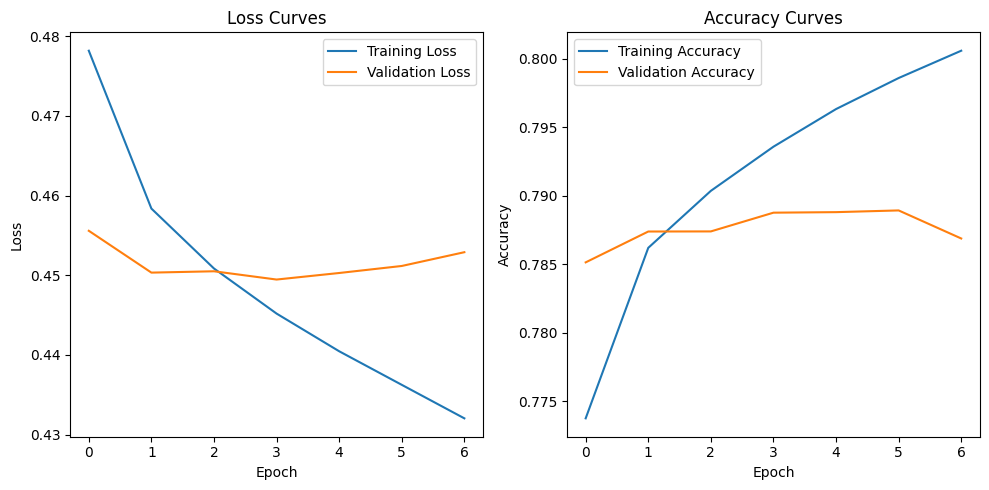

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


### Save the Model , Tokenizer and max_sequence_length

In [13]:
import pickle

model.save('sentiment_model.keras')

with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

with open('max_sequence_length.pkl', 'wb') as f:
    pickle.dump(max_sequence_length, f)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### usage

In [2]:
from keras._tf_keras.keras.models import load_model
from keras._tf_keras.keras.preprocessing.sequence import pad_sequences
import pickle
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
Lemmatizer=WordNetLemmatizer()

In [3]:
# Load the model
loaded_model = load_model("model/sentiment_model.keras")

# Load the tokenizer
with open('model/tokenizer.pkl', 'rb') as f:
    loaded_tokenizer = pickle.load(f)

# Load the max_sequence_length
with open('model/max_sequence_length.pkl', 'rb') as f:
    max_sequence_length = pickle.load(f)


In [4]:
# Classify New Text
def classify_text(text, tokenizer, model, max_sequence_length):
    text = NLP(text)
    text_sequence = tokenizer.texts_to_sequences([text])
    text_padded = pad_sequences(text_sequence, maxlen=max_sequence_length)
    prediction = model.predict(text_padded)[0][0]
    return "Positive" if prediction > 0.5 else "Negative"



In [11]:
# data collected from twitter
new_texts = ["@kissibar: just watched an angel lose its wings in real time"
            ,"I absolutely love this product, it's fantastic!"
            ,'Most satisfying video ever'
            ,"Sadly this can be true even in a relationship. On TikTok a girl posted a video of herself surprising her boyfriend on New Year's Eve,and obvious to everyone else (but not to her) when he saw her he wasn't delighted  he turned red, he scanned the room, he even pushed her away. His reaction was so bad that some creators even theorized that she was a stalker. She wasn't; they were engaged a month ago."
            ,"not to be dramatic but they'er at an airport during a mourning period for innocent lives lost due to an AIRPLANE CRASH and they have to deal with THIS?fuck you if you go to airports to shove a phone in their faces EVER, but ESPECIALLY now."
            ,"Ithaca Saga is my new fav Christmas album #epicthemusical #fanart"]


In [34]:
result = [(text,classify_text(text, loaded_tokenizer, loaded_model, max_sequence_length)) for text in new_texts]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [35]:
result

[('@kissibar: just watched an angel lose its wings in real time', 'Negative'),
 ("I absolutely love this product, it's fantastic!", 'Positive'),
 ('Most satisfying video ever', 'Positive'),
 ("Sadly this can be true even in a relationship. On TikTok a girl posted a video of herself surprising her boyfriend on New Year's Eve,and obvious to everyone else (but not to her) when he saw her he wasn't delighted  he turned red, he scanned the room, he even pushed her away. His reaction was so bad that some creators even theorized that she was a stalker. She wasn't; they were engaged a month ago.",
  'Negative'),
 ("not to be dramatic but they'er at an airport during a mourning period for innocent lives lost due to an AIRPLANE CRASH and they have to deal with THIS?fuck you if you go to airports to shove a phone in their faces EVER, but ESPECIALLY now.",
  'Negative'),
 ('Ithaca Saga is my new fav Christmas album #epicthemusical #fanart',
  'Positive')]